In [3]:
# Katarzyna Stojek

# python 3.11.2
# numpy 1.24.2
# scipy 1.10.1
# matplotlib 3.7.1

import numpy as np
import scipy.signal as sig
from scipy.io import wavfile
import matplotlib.pyplot as plt

Wstęp: 

Celem zadania było zapoznanie się i zaimplementowanie transformaty Fouriera w krótkim oknie oraz transformaty liniowej Wigner-Ville. W tym celu wykorzystany zostanie świergot liniowy, który w pythonie uzyskać można przy pomocy funkcji chirp() z biblioteki SciPy Signal.

Świergot liniowy to sygnał dla którego częstość rośnie liniowo z czasem jak f(t)=f_1+k*t

Teoretyczne widmo świergotu liniowego na płaszczyźnie czasu i częstości jest zatem pojedynczą linią ukośną.

Text(0.5, 1.0, 'Sygnał: świergot liniowy')

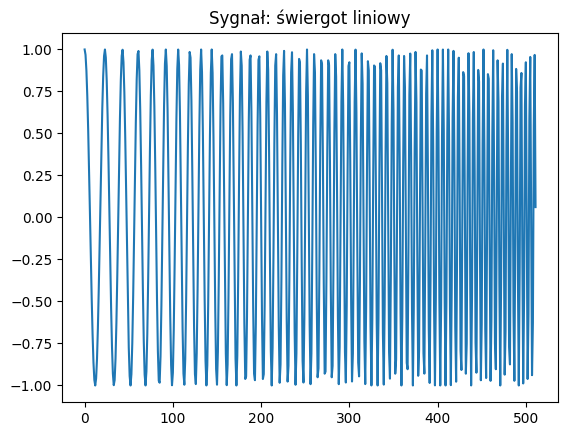

In [4]:
# transformata Fouriera w krótkim oknie

# Parametry generowanego sygnału
fs = 500 # częstotliwość próbkowania
N = 512 # liczba próbek
f1 = 20 # częstotliwość początkowa
f2 = 100 # częstotliwość końcowa
t = N/fs # czas trwania sygnału [s]
tn = np.arange(N)/fs # kolejne kroki czasowe

chirp = sig.chirp(tn, f1, t, f2, 'linear')

plt.plot(chirp)
plt.title("Sygnał: świergot liniowy")

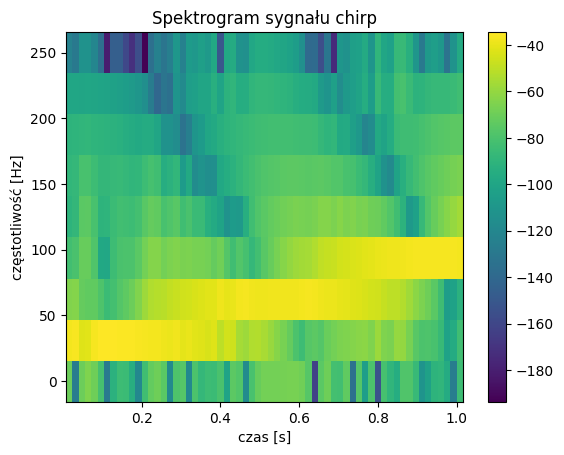

In [5]:
nfft = 16 # okno czasowe

f, t, Sxx = sig.spectrogram(chirp, fs=fs, noverlap=nfft/2, nperseg=nfft)
plt.pcolormesh(t, f, 20 * np.log10(Sxx))
plt.xlabel('czas [s]')
plt.ylabel('częstotliwość [Hz]')
plt.title('Spektrogram sygnału chirp')
plt.colorbar()
plt.show()
# duża dokładność czasu - mała dokładność częstotliwości

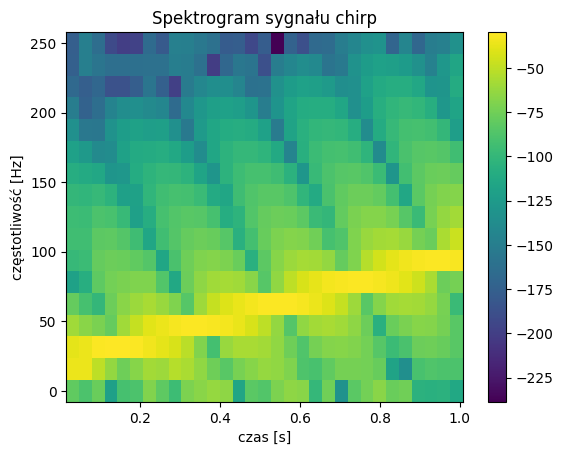

In [6]:
nfft = 32

f, t, Sxx = sig.spectrogram(chirp, fs=fs, noverlap=nfft/2, nperseg=nfft)
plt.pcolormesh(t, f, 20 * np.log10(Sxx))
plt.xlabel('czas [s]')
plt.ylabel('częstotliwość [Hz]')
plt.title('Spektrogram sygnału chirp')
plt.colorbar()
plt.show()
# mniejsza dokładność czasu - większa częstotliwości

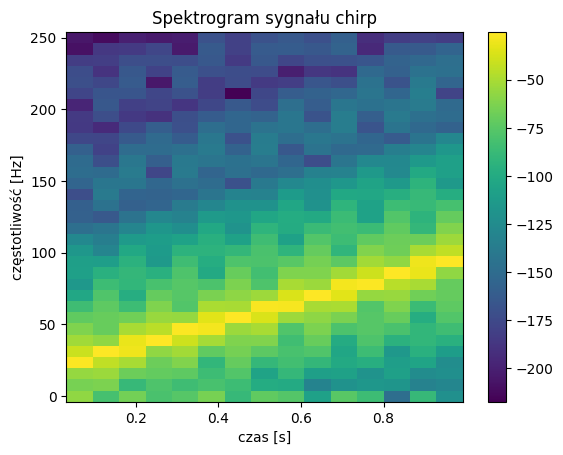

In [7]:
nfft = 64

f, t, Sxx = sig.spectrogram(chirp, fs=fs, noverlap=nfft/2, nperseg=nfft)
plt.pcolormesh(t, f, 20 * np.log10(Sxx))
plt.xlabel('czas [s]')
plt.ylabel('częstotliwość [Hz]')
plt.title('Spektrogram sygnału chirp')
plt.colorbar()
plt.show()

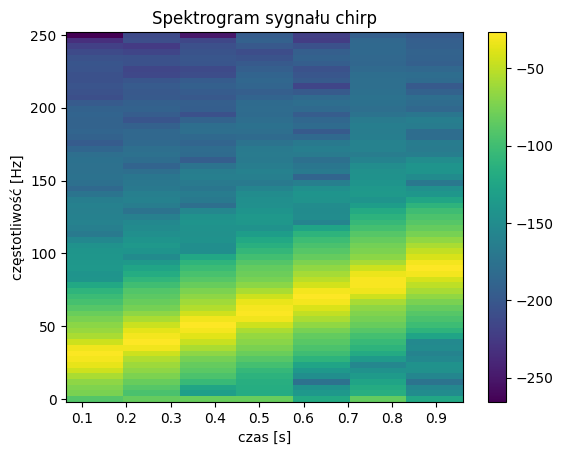

In [8]:
nfft = 128

f, t, Sxx = sig.spectrogram(chirp, fs=fs, noverlap=nfft/2, nperseg=nfft)
plt.pcolormesh(t, f, 20 * np.log10(Sxx))
plt.xlabel('czas [s]')
plt.ylabel('częstotliwość [Hz]')
plt.title('Spektrogram sygnału chirp')
plt.colorbar()
plt.show()

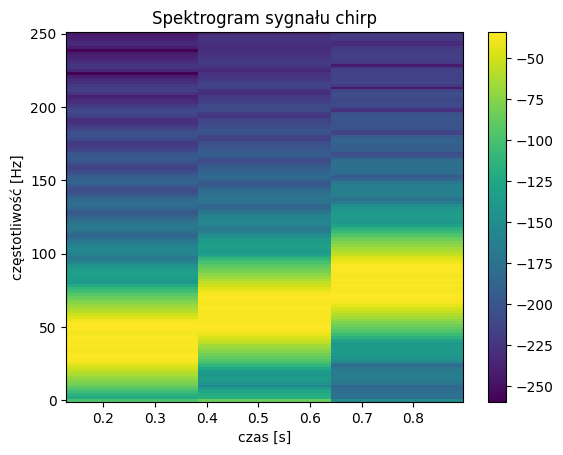

In [9]:
nfft = 256

f, t, Sxx = sig.spectrogram(chirp, fs=fs, noverlap=nfft/2, nperseg=nfft)
plt.pcolormesh(t, f, 20 * np.log10(Sxx))
plt.xlabel('czas [s]')
plt.ylabel('częstotliwość [Hz]')
plt.title('Spektrogram sygnału chirp')
plt.colorbar()
plt.show()
# najlepsza dokładność dla częstotliwości, najgorsza dla czasu

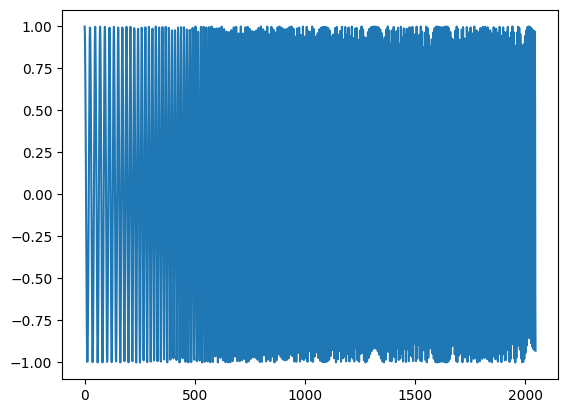

In [10]:
# Generowanie sygnału czterokrotnie dłuższego.
N4 = 512*4
t4 = N4/fs
tn4 = np.arange(N4)/fs

chirp4 = sig.chirp(tn4, f1, t4, f2, 'linear')

plt.plot(chirp4)

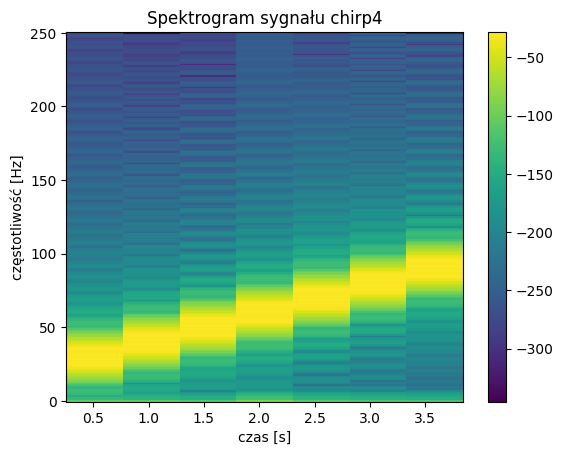

In [11]:
nfft = 512

f, t, Sxx = sig.spectrogram(chirp4, fs=fs, noverlap=nfft/2, nperseg=nfft)
plt.pcolormesh(t, f, 20 * np.log10(Sxx))
plt.xlabel('czas [s]')
plt.ylabel('częstotliwość [Hz]')
plt.title('Spektrogram sygnału chirp4')
plt.colorbar()
plt.show()

Wnioski dot. transformaty Fouriera w krótkim oknie:

Teoretyczna postać widma dla badanego sygnełu powinna przybierać formę pojedynczej ukośnej linii. Na otzymanych wykresach możemy dostrzec żółtą linię, która odpowiada przewidywanej formie. Widoczne jest jednak rozmycie.

W zależności od dobranego okna uzyskujemy albo lepszą dokładność dla czasu (rozdzielczość czasowa dana jest przez długość okna), albo lepszą dokładność dla częstotliwości. Za pomocą tej transormaty nie jest możliwe zwiększenie dokładności dla jednego z tych parametrów nie zmniejszając przy tym dokładności dla drugiego. Wynika to z zasady nieoznaczoności Heisenberga wg. której nie możemy jednocześnie określić dokładnie czasu i częstotliwości dla badanego sygnału. Wynika to z matematyki problemu a nie np. nie dość dobrych narzędzi.

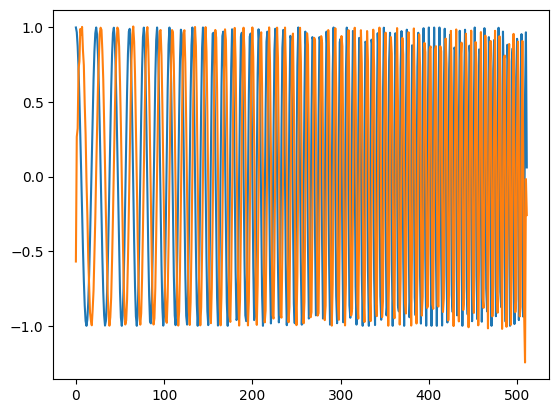

In [12]:
# transformata Hilberta
# transformata ta jest konieczna, ponieważ transformata W-V wymaga funkcji analitycznej.
chirp_h = sig.hilbert(chirp)
plt.plot(np.real(chirp_h))
plt.plot(np.imag(chirp_h))

C:\Users\VPC_P1510\AppData\Local\Temp\ipykernel_7296\2057321734.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t1, f1, 20 * np.log10(Sxx_abs))


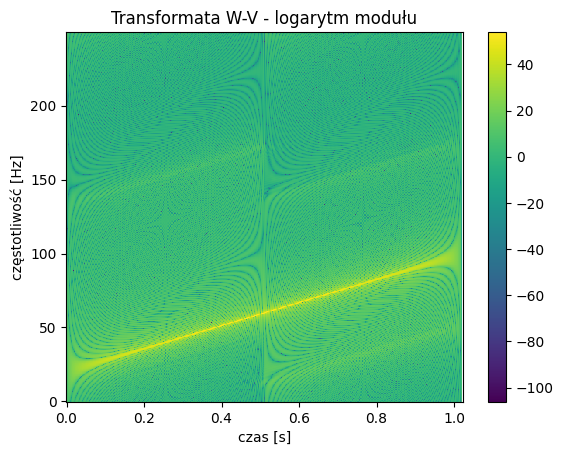

In [13]:
# transformata Wigner-Ville'a
from cohen import cohen
Sxx, f1, t1 = cohen(chirp_h,fs)
Sxx_abs = np.abs(Sxx)

plt.pcolormesh(t1, f1, 20 * np.log10(Sxx_abs))
plt.xlabel('czas [s]')
plt.ylabel('częstotliwość [Hz]')
plt.title('Transformata W-V - logarytm modułu')
plt.colorbar()

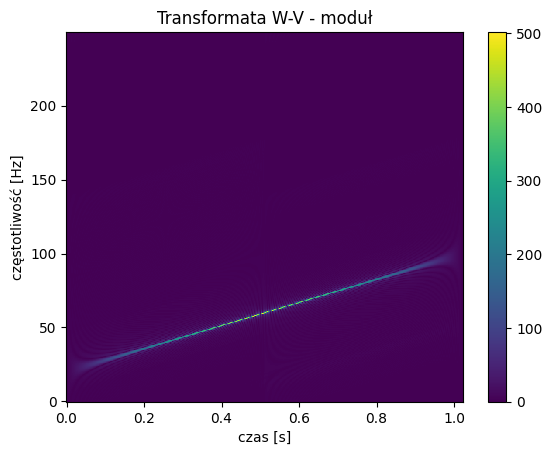

In [14]:
plt.pcolormesh(t1, f1, Sxx_abs)
plt.xlabel('czas [s]')
plt.ylabel('częstotliwość [Hz]')
plt.title('Transformata W-V - moduł')
plt.colorbar()

# na wykresie widoczna mniejsza liczba datali niż w przypadku z logarytmowaniem.

C:\Users\VPC_P1510\AppData\Local\Temp\ipykernel_7296\1636882935.py:4: RuntimeWarning: divide by zero encountered in log10
  ax1.pcolormesh(t1, f1, 20 * np.log10(Sxx_abs))


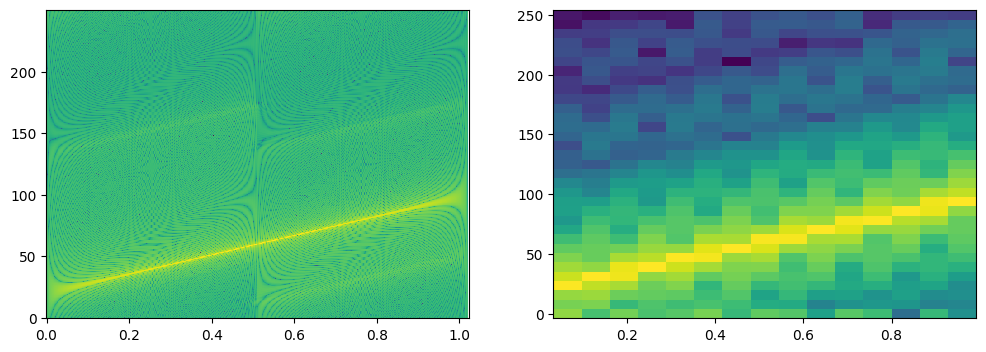

In [15]:
nfft = 64
# Transformata W-V vs STFT
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.pcolormesh(t1, f1, 20 * np.log10(Sxx_abs))
f2, t2, Sxx2 = sig.spectrogram(chirp, fs=fs, noverlap=nfft/2, nperseg=nfft)
ax2.pcolormesh(t2, f2, 20 * np.log10(Sxx2))

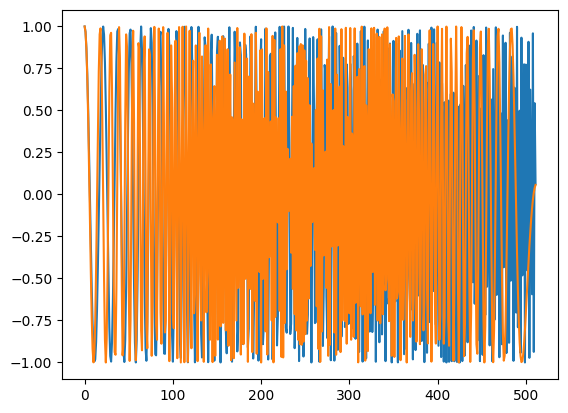

In [16]:
N = 512
f1 = 20
f2 = 200
f5 = 500
t = N/fs
tn = np.arange(N)/fs

chirp2 = sig.chirp(tn, f1, t, f2, 'linear')
chirp5 = sig.chirp(tn, f1, t, f5, 'linear')

plt.plot(chirp2)
plt.plot(chirp5)

C:\Users\VPC_P1510\AppData\Local\Temp\ipykernel_7296\502407399.py:8: RuntimeWarning: divide by zero encountered in log10
  ax1.pcolormesh(t12, f12, 20 * np.log10(Sxx_abs2))


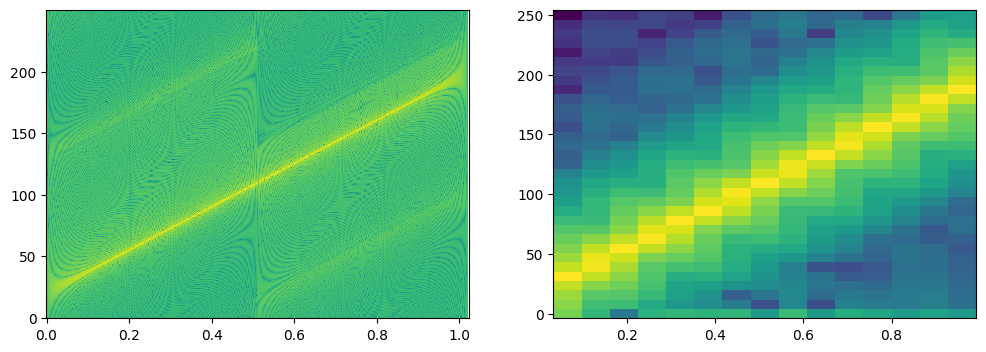

In [17]:
chirp_h2 = sig.hilbert(chirp2)
Sxx2, f12, t12 = cohen(chirp_h2,fs)
Sxx_abs2 = np.abs(Sxx2)

nfft = 64
# Transformata W-V vs STFT
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.pcolormesh(t12, f12, 20 * np.log10(Sxx_abs2))
f22, t22, Sxx22 = sig.spectrogram(chirp2, fs=fs, noverlap=nfft/2, nperseg=nfft)
ax2.pcolormesh(t22, f22, 20 * np.log10(Sxx22))

C:\Users\VPC_P1510\AppData\Local\Temp\ipykernel_7296\3936695064.py:8: RuntimeWarning: divide by zero encountered in log10
  ax1.pcolormesh(t15, f15, 20 * np.log10(Sxx_abs5))


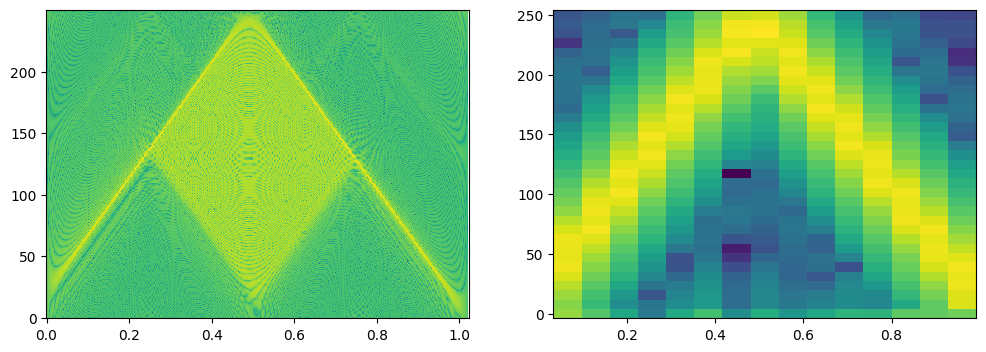

In [18]:
chirp_h5 = sig.hilbert(chirp5)
Sxx5, f15, t15 = cohen(chirp_h5,fs)
Sxx_abs5 = np.abs(Sxx5)

nfft = 64
# Transformata W-V vs STFT
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.pcolormesh(t15, f15, 20 * np.log10(Sxx_abs5))
f25, t25, Sxx25 = sig.spectrogram(chirp5, fs=fs, noverlap=nfft/2, nperseg=nfft)
ax2.pcolormesh(t25, f25, 20 * np.log10(Sxx25))

Dla transformaty W-V na wykresie powstaje kształt przypominający romb, który nie jest obecny przy wykorzystywaniu STFT.

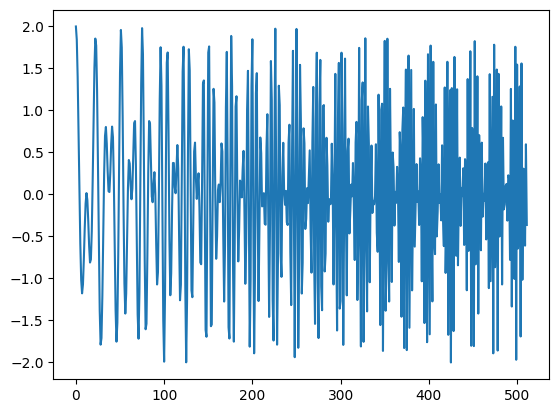

In [19]:
N = 512
f1 = 20
f2 = 200
f1p = 2 * f1
f2p = f2 + f1
t = N/fs
tn = np.arange(N)/fs

chirp_s1 = sig.chirp(tn, f1, t, f2, 'linear')
chirp_s2 = sig.chirp(tn, f1p, t, f2p, 'linear')
chirp_sum = chirp_s1 + chirp_s2
plt.plot(chirp_sum)


C:\Users\VPC_P1510\AppData\Local\Temp\ipykernel_7296\2696182152.py:8: RuntimeWarning: divide by zero encountered in log10
  ax1.pcolormesh(t1, f1, 20 * np.log10(Sxx_abs))


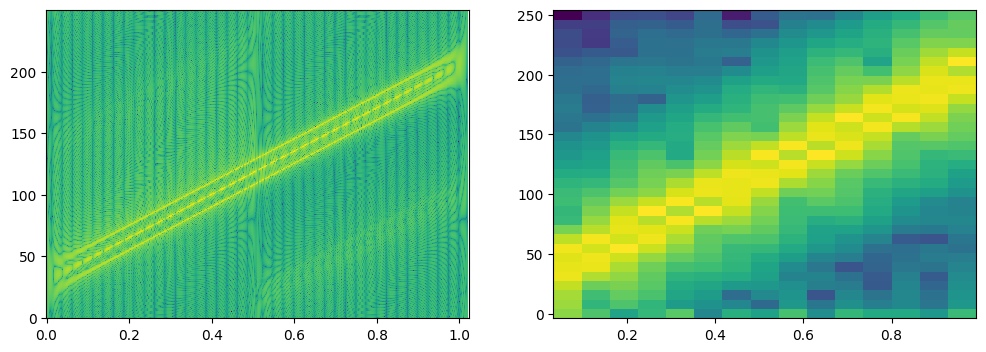

In [20]:
chirp_sum_h = sig.hilbert(chirp_sum)
Sxx, f1, t1 = cohen(chirp_sum_h,fs)
Sxx_abs = np.abs(Sxx)

nfft = 64
# Transformata W-V vs STFT
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.pcolormesh(t1, f1, 20 * np.log10(Sxx_abs))
f2, t2, Sxx2 = sig.spectrogram(chirp_sum, fs=fs, noverlap=nfft/2, nperseg=nfft)
ax2.pcolormesh(t2, f2, 20 * np.log10(Sxx2))

Mimo sumowania jedynie 2 sygnałów widzimy 3 linie po stronie transformaty W-V.

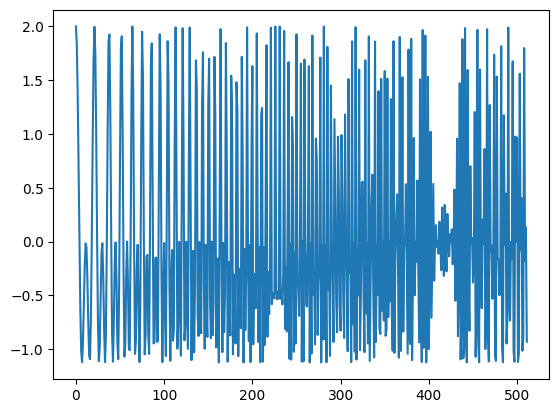

In [21]:
N = 512
f1 = 20
f2 = 200
f1p = 2 * f1
f2p = 2 * f2
t = N/fs
tn = np.arange(N)/fs

chirp_s1 = sig.chirp(tn, f1, t, f2, 'linear')
chirp_s2 = sig.chirp(tn, f1p, t, f2p, 'linear')
chirp_sum2 = chirp_s1 + chirp_s2
plt.plot(chirp_sum2)

C:\Users\VPC_P1510\AppData\Local\Temp\ipykernel_7296\3536488169.py:8: RuntimeWarning: divide by zero encountered in log10
  ax1.pcolormesh(t1, f1, 20 * np.log10(Sxx_abs))


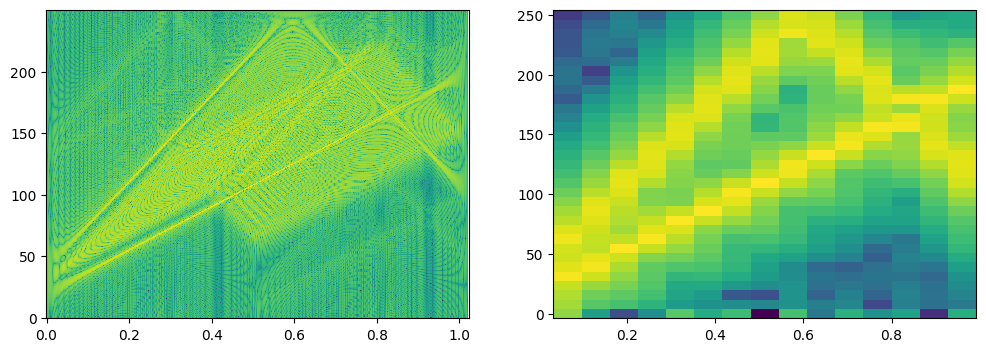

In [22]:
chirp_sum_h = sig.hilbert(chirp_sum2)
Sxx, f1, t1 = cohen(chirp_sum_h,fs)
Sxx_abs = np.abs(Sxx)

nfft = 64
# Transformata W-V vs STFT
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.pcolormesh(t1, f1, 20 * np.log10(Sxx_abs))
f2, t2, Sxx2 = sig.spectrogram(chirp_sum2, fs=fs, noverlap=nfft/2, nperseg=nfft)
ax2.pcolormesh(t2, f2, 20 * np.log10(Sxx2))

Transformata STFT daje wynik w postaci przypominającej dwie (lub 3 jeżeli rozważymy łamaną jako 2 oddzielne linie) dla transformaty WV widoczne są dodatkowe kształty.

Wnioski dot. transformaty Wigner-Ville:

Transformata W-V umożliwia otrzymanie większej dokładności w dziedzinie czasu i częstotliwości w porównaniu do transformaty Fouriera w krótkim oknie czasowym. Może zatem stanowić przydatne narzędzie w analizie sygnału. Należy jednak zachować ostrożność ponieważ dokonuje ona tego kosztem m. in. wprowadzania wartości ujemnych które przekładałaby się na ujemną energię (1.), co jest niefizyczne.

Źródła:
1. http://case.caltech.edu/tfr/

Wnioski ogólne:

Udało się wykonać poszczególne ćwiczenia. Pozwoliło to na pogłębienie znajomości badanych technik i pozytywnie wpłyneło na ich zrozumienie. Zrealizowano zatem cel zadania.